In [1]:
#import libraries
import tmdbsimple as tmdb
from imdb import IMDb

%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/Users/khojanclark/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#URL for key
#https://api.themoviedb.org/3/movie/550?api_key=822771ddecfdc59a99893ffeaa1ec9b4
tmdb.API_KEY = '822771ddecfdc59a99893ffeaa1ec9b4'##'455e4535405115285f107dc76734be7e'

In [3]:
url = "https://raw.githubusercontent.com/paulharris171/cs109b-Movie-Prediction-/master/movie_dataframe2.csv?token=AKUONWerw8lBcd-94Nl3ERdcv0vIjlrjks5ZELLswA%3D%3D"
data = pd.read_csv(url)

In [4]:
data.head()

,director_name,budget,genres,actor_1_name,movie_title,plot_keywords,content_rating,genre_adjusted
0,James Bobin,170000000.0,"['Adventure', 'Family', 'Fantasy']",Johnny Depp,Alice Through the Looking Glass,"['clock', 'dark fantasy', 'mad hatter', 'queen...",PG,Adventure
1,Jon M. Chu,90000000.0,"['Action', 'Adventure', 'Comedy', 'Crime', 'My...",Daniel Radcliffe,Now You See Me 2,"['card trick', 'london england', 'magician', '...",PG-13,Action
2,Michael Mann,70000000.0,"['Action', 'Crime', 'Drama', 'Mystery', 'Thril...",Chris Hemsworth,Blackhat,"['chinese', 'computer', 'cybercrime', 'hacker'...",R,Action
3,Joel Schumacher,70000000.0,"['Drama', 'Musical', 'Romance', 'Thriller']",Gerard Butler,The Phantom of the Opera,"['based on stage musical based on novel', 'dis...",PG-13,Drama
4,Peter Ramsey,145000000.0,"['Adventure', 'Animation', 'Family', 'Fantasy']",Hugh Jackman,Rise of the Guardians,"['belief', 'box office hit', 'children', 'new ...",PG,Adventure


## Messing Around

In [5]:
#Search for The Matrix in TMDb
search = tmdb.Search()
response = search.movie(query='The Matrix')

#Initialize base structure for the posters 
base_url = "http://image.tmdb.org/t/p/w185"
matrix_poster = base_url + response['results'][0]['poster_path']
#Then write code to append the poster path to the end of base_url
print "The link for the movie poster is found below:"
matrix_poster

#import urllib
#urllib.urlretrieve(matrix, "local-filename.jpg")

# Here's the final product link  http://image.tmdb.org/t/p/w185/lZpWprJqbIFpEV5uoHfoK0KCnTW.jpg

The link for the movie poster is found below:


u'http://image.tmdb.org/t/p/w185/lZpWprJqbIFpEV5uoHfoK0KCnTW.jpg'

In [6]:
this = np.array([[1,1],[1,2]])

In [7]:
search = tmdb.Search()
response = search.movie(query='The Matrix')
base_url = "http://image.tmdb.org/t/p/w185"
matrix_poster = base_url + response['results'][0]['poster_path']
#Then write code to append the poster path to the end of base_url
print "The link for the movie poster is found below:"
matrix_poster
import urllib
from PIL import Image
urllib.urlretrieve(matrix_poster, "local-filename.jpg")
one = Image.open('photos/local-filename.jpg')

The link for the movie poster is found below:


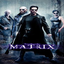

In [8]:
one2 = one.resize((64, 64), Image.ANTIALIAS)
one2

In [9]:
um = np.array(one2)

In [10]:
this = np.expand_dims(um, axis = 0)
this.shape

(1, 64, 64, 3)

In [11]:
yus = np.stack((um,um))

In [12]:
yus.shape

(2, 64, 64, 3)

In [13]:
ruh = np.concatenate((yus,yus))

In [14]:
ruh.shape

(4, 64, 64, 3)

In [15]:
np.concatenate((yus,ruh)).shape

(6, 64, 64, 3)

In [16]:
data["movie_title"][1][:-2]

'Now You See Me 2'

## Implementation

In [17]:
print set(data["genre_adjusted"])
len(set(data["genre_adjusted"]))

set(['Mystery', 'Romance', 'Sci-Fi', 'Horror', 'Crime', 'Drama', 'Fantasy', 'Animation', 'Adventure', 'Action', 'Comedy', 'Documentary', 'Biography'])


13

In [18]:
thaa = pd.DataFrame(data_dropped.iloc[0]).transpose()
thaa = thaa.append(thaa)
thaa = thaa.append(pd.DataFrame(data_dropped.iloc[2]).transpose())
np.array(thaa).shape

NameError: name 'data_dropped' is not defined

In [47]:
data_dropped = data.drop(['genres', 'genre_adjusted'], axis=1)
for i in range(len(data_dropped["plot_keywords"])):
    data_dropped["plot_keywords"].iloc[i] = eval(data_dropped["plot_keywords"][i])
    if (data_dropped["content_rating"].iloc[i] == 'PG-13'):
        data_dropped["content_rating"].iloc[i] = 'TH'
    #data_dropped[] = 
this = np.array(data_dropped)

In [54]:
import time
#base url
base_url = "http://image.tmdb.org/t/p/w185"
search = tmdb.Search()
images = 0
genres = []
count = 1
k = 25
switch = False
#Create for loop that cycles through dataframe.movie_title
for i in range(len(data["movie_title"])):
    ####
    #Search for movie.
    movie_title = data["movie_title"][i][:-2]
    response = search.movie(query=movie_title)
    #Create movie poster url.
    print(movie_title)
    if (response['total_results'] != 0):
        if (response['results'][0]['poster_path'] is not None):
            if (data["genre_adjusted"][i] != 'Romance'):
                    #print len(response['results'][0]['poster_path'])
                poster_url = base_url + response['results'][0]['poster_path']
                #Retrieve jpg version from url.
                urllib.urlretrieve(poster_url, "photos/local-file.jpg")
                img = Image.open('photos/local-file.jpg')
                #RGBA check.
                img = img.convert('RGB')
                #Resize.
                img = img.resize((64, 64), Image.ANTIALIAS)
                img = np.array(img)
                img = np.expand_dims(img, axis = 0)
                #Add image to numpy array stack
                if(i == 0):
                    images = img
                    metadata = pd.DataFrame(data_dropped.iloc[i]).transpose()
                else:
                    #print images.shape
                    #print img.shape
                    images = np.concatenate((images, img))
                    metadata = metadata.append(pd.DataFrame(data_dropped.iloc[i]).transpose())

                ## add to genres
                genres = np.append(genres, data["genre_adjusted"][i])
            

    if(count == k):
        k += 25
        time.sleep(3)
        if switch:
            print(count)
            switch = False
        else:
            switch = True
    count += 1

metadata = np.array(metadata)

Alice Through the Looking Glass
Now You See Me 2
Blackhat
The Phantom of the Opera
Rise of the Guardians
Ponyo
Cast Away
Blood Work
3000 Miles to Graceland
Catch Me If You Can
Oceans
The Life of David Gale
22 Jump Street
The Mortal Instruments: City of Bones
The Dukes of Hazzard
Walk the Line
Despicable Me 2
The Island of Dr. Moreau
The Pledge
Kicking & Screaming
The Hangover
At First Sight
Blast from the Past
Predator 2
Man of Steel
Life of Pi
Red Planet
First Blood
The Incredible Burt Wonderstone
Resident Evil: Apocalypse
Lolita
The Ghost Writer
Dreamcatcher
The Alamo
Once Upon a Time in America
Just Go with It
Machine Gun Preacher
Spirit: Stallion of the Cimarron
Four Christmases
Big Hero 6
The English Patient
Megamind
Surrogates
Valiant
Spy Game
Agora
Ghostbusters
Snakes on a Plane
Arachnophobia
London Has Fallen
50
Ice Age: The Meltdown
The Big Wedding
Entrapment
The Royal Tenenbaums
The Haunted Mansion
The Borrowers
License to Wed
Valentine's Day
Blades of Glory
P.S. I Love You
M

### Testing Out

In [20]:
#print img
#Resize.
img = Image.open('photos/local-file.jpg')
img = img.convert('RGB')
img = img.resize((100, 100), Image.ANTIALIAS)
img = np.array(img)
img = np.expand_dims(img, axis = 0)
img.shape

(1, 100, 100, 3)

In [21]:
img.shape[3] == 3

True

In [79]:

#this = np.array(data_dropped)
#this.shape

(1721, 6)

# Keras - Scratch

In [21]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

Hello, TensorFlow!


In [22]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Merge

from keras.optimizers import SGD

from keras import backend as K

Using TensorFlow backend.


In [172]:
def shuffle_in_unison(a,b,c):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)
    np.random.set_state(rng_state)
    np.random.shuffle(c)

shuffle_in_unison(images, genres, metadata)

In [173]:
n = len(images)
split = int(n * .5)
x_train = images[:split,]
x_test = images[split:,]
m_train = metadata[:split,]
m_test = metadata[split:,]
y_train = genres[:split]
y_test = genres[split:]


In [174]:
np.array(m_train, dtype=object)

array([['McG', 200000000.0, 'Christian Bale',
        'Terminator Salvation\xc2\xa0',
        ['death row', 'future', 'machine', 'rescue', 'skynet'], 'TH'],
       ['Roland Joff\xc3\xa9', 50000000.0, 'Gary Oldman',
        'The Scarlet Letter\xc2\xa0',
        ['17th century', 'adultery', 'letter', 'pubic hair', 'swimming'],
        'R'],
       ['Peter Weir', 60000000.0, 'Natascha McElhone',
        'The Truman Show\xc2\xa0',
        ['controlled environment', 'fictional reality show', 'hidden camera', 'innocence lost', 'simulated reality'],
        'PG'],
       ..., 
       ['Kelly Makin', 40000000.0, 'Jeanne Tripplehorn',
        'Mickey Blue Eyes\xc2\xa0',
        ['auctioneer', 'fbi', 'mafia', 'mobster', 'painting'], 'TH'],
       ['Alan Taylor', 155000000.0, 'J.K. Simmons',
        'Terminator Genisys\xc2\xa0',
        ['alternate timeline', 'cyborg', 'future', 'robot', 'time machine'],
        'TH'],
       ['Stephen Daldry', 40000000.0, 'Tom Hanks',
        'Extremely Loud & I

In [175]:
# input image dimensions
img_rows, img_cols = 64, 64

# smaller batch size means noisier gradient, but more updates per epoch
batch_size = 15
# this is fixed, we have 13 digits in our data set
#############SHOULD BE CHANGED ONCE WE HAVE MORE DATA###############
num_classes = 12
# number of iterations over the complete training data
epochs = 20

## X_train is of shape n_samples x 64 x 64
## for a CNN we want to keep the image shape
## need to explicitly tell keras that it is a gray value image
## so each image is 28x28x1 not 28x28x3
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

# normalize image values to [0,1]
# interestingly the keras example code does not center the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (857, 64, 64, 3)
857 train samples
858 test samples


In [176]:
# convert class vectors to binary class matrices
# keras likes one hot encoding instead of class names
y_train = np.array(pd.get_dummies(y_train))
y_test = np.array(pd.get_dummies(y_test))

In [177]:
y_train.shape

(857, 12)

In [178]:
m_train

array([['McG', 200000000.0, 'Christian Bale',
        'Terminator Salvation\xc2\xa0',
        ['death row', 'future', 'machine', 'rescue', 'skynet'], 'TH'],
       ['Roland Joff\xc3\xa9', 50000000.0, 'Gary Oldman',
        'The Scarlet Letter\xc2\xa0',
        ['17th century', 'adultery', 'letter', 'pubic hair', 'swimming'],
        'R'],
       ['Peter Weir', 60000000.0, 'Natascha McElhone',
        'The Truman Show\xc2\xa0',
        ['controlled environment', 'fictional reality show', 'hidden camera', 'innocence lost', 'simulated reality'],
        'PG'],
       ..., 
       ['Kelly Makin', 40000000.0, 'Jeanne Tripplehorn',
        'Mickey Blue Eyes\xc2\xa0',
        ['auctioneer', 'fbi', 'mafia', 'mobster', 'painting'], 'TH'],
       ['Alan Taylor', 155000000.0, 'J.K. Simmons',
        'Terminator Genisys\xc2\xa0',
        ['alternate timeline', 'cyborg', 'future', 'robot', 'time machine'],
        'TH'],
       ['Stephen Daldry', 40000000.0, 'Tom Hanks',
        'Extremely Loud & I

In [179]:
# create an empty network model
image_processor = Sequential()

# --- input layer ---
image_processor.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# --- max pool ---
image_processor.add(MaxPooling2D(pool_size=(2, 2)))

# --- next layer ---
# we could double the number of filters as max pool made the 
# feature maps much smaller 
# just not doing this to improve runtime
image_processor.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# --- max pool ---
image_processor.add(MaxPooling2D(pool_size=(2, 2)))

# flatten for fully connected classification layer
image_processor.add(Flatten())
# note that the 13 is the number of classes we have
# the classes are mutually exclusive so softmax is a good choice
#############SHOULD BE CHANGED ONCE WE HAVE MORE DATA###############
# --- fully connected layer ---
image_processor.add(Dense(64, activation='relu'))
# --- classification ---
#############SHOULD BE CHANGED ONCE WE HAVE MORE DATA###############
image_processor.add(Dense(12, activation='softmax'))


# Now we create the metadata model
metadata_processor = Sequential()
metadata_processor.add(Dense(12, input_dim=6))
metadata_processor.add(Activation('relu'))

# Now we concatenate the two features and add a few more layers on top
number_of_classes = 12
model = Sequential()
model.add(Merge([image_processor, metadata_processor], mode='concat'))# Merge is your sensor fusion buddy
model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))






# prints out a summary of the model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_11 (Merge)             (None, 24)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 6)                 150       
_________________________________________________________________
dense_55 (Dense)             (None, 12)                84        
Total params: 407,658
Trainable params: 407,658
Non-trainable params: 0
_________________________________________________________________


/Users/khojanclark/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:37: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [180]:
y_test.shape

(858, 12)

In [181]:
# this does all necessary compiling. In tensorflow this is much quicker than in theano
# the setup is our basic categorical crossentropy with stochastic gradient decent
# we also specify that we want to evaluate our model in terms of accuracy
sgd = SGD(lr=0.1, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [182]:
# this is now the actual training
# in addition to the training data we provide validation data
# this data is used to calculate the performance of the model over all the epochs
# this is useful to determine when training should stop
# in our case we just use it to monitor the evolution of the model over the training epochs
# if we use the validation data to determine when to stop the training or which model to save, we 
# should not use the test data, but a separate validation set. 
#[x_train,np.delete(m_train, 5, 1)]
#np.array(m_test, dtype=object)
history = model.fit([x_train,m_train], y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=([x_test,m_test], y_test))

# once training is complete, let's see how well we have done
score = model.evaluate([x_test,m_test], y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 857 samples, validate on 858 samples
Epoch 1/20


ValueError: could not convert string to float: TH

In [184]:
np.delete(m_train, [0,1,2,3,4,], 1)

array([['TH'],
       ['R'],
       ['PG'],
       [nan],
       ['TH'],
       ['TH'],
       ['R'],
       ['R'],
       ['R'],
       ['TH'],
       ['PG'],
       ['R'],
       ['TH'],
       ['R'],
       ['R'],
       ['TH'],
       ['TH'],
       ['R'],
       ['R'],
       ['R'],
       ['TH'],
       ['R'],
       ['TH'],
       ['R'],
       ['TH'],
       ['TH'],
       ['TH'],
       ['PG'],
       ['TH'],
       ['TH'],
       ['TH'],
       ['TH'],
       ['R'],
       ['TH'],
       ['TH'],
       ['TH'],
       ['PG'],
       ['TH'],
       ['G'],
       ['PG'],
       ['PG'],
       ['R'],
       ['TH'],
       ['PG'],
       ['TH'],
       ['R'],
       ['R'],
       ['TH'],
       ['PG'],
       ['TH'],
       ['TH'],
       ['TH'],
       ['TH'],
       ['PG'],
       ['R'],
       ['R'],
       ['R'],
       ['TH'],
       ['PG'],
       ['R'],
       ['TH'],
       ['R'],
       ['G'],
       ['TH'],
       ['R'],
       ['TH'],
       ['TH'],
       ['R'],
      

In [185]:
# here is a visualization of the training process
# typically we gain a lot in the beginning and then
# training slows down
plt.plot(history.history['acc'])
plt.xlabel("epoch")
plt.ylabel("accuracy")

NameError: name 'history' is not defined

In [58]:
# Look at the weights of the first layer
layer = model.layers[0]
# this actually returns a list 
# first element is W
# second element are all the biases b
weights = layer.get_weights()
# the weights are the number of pixels times the number of filters (hidden units)
print("Shape of W")
print(weights[0].shape)

Shape of W
(3, 3, 3, 16)


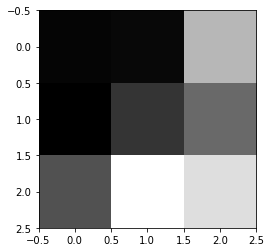

In [59]:
# look at just the first filter
w = weights[0][:,:,0,0]
w = w.reshape((3,3))
plt.imshow(w, cmap='gray')

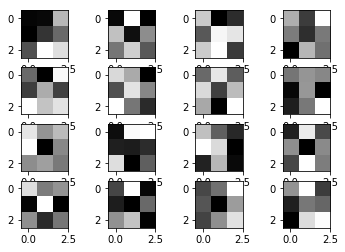

In [60]:
# make a figure for the first 25 filters
index = 0
for i in range(4):
    for j in range(4):
        w = weights[0][:,:,0,index]
        w = w.reshape(3,3)
        index+=1
        plt.subplot(4,4,index)
        plt.imshow(w, cmap='gray')    

plt.show()

# Keras - PreTrain

In [43]:
pretrained = keras.applications.vgg19.VGG19(include_top=True, weights='imagenet', input_tensor=None, input_shape=None)